# Softmax Activation and Cross-Entropy Cost intuition

## 2D interactive visualization

In [1]:
import numpy as np
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FixedTicker
from bokeh.io import output_notebook, show, push_notebook
from bokeh.layouts import gridplot
from ipywidgets import interact, FloatSlider, Layout
output_notebook()

Loading BokehJS ...

In [2]:
import warnings
warnings.filterwarnings('ignore')

$$ y_i(\mathbf{z}) = \frac{e^{z_i/T}}{\sum\limits_{j} e^{z_j/T}} $$

In [15]:
def softmax(z, T=1):
    return np.exp(z/T)/np.sum(np.exp(z/T))

$$ C(\mathbf{y},\mathbf{t}) = -\sum\limits_{j} t_j \log y_j $$

In [4]:
def cross_entropy(y, t=[1, 0, 0, 0]):
    return -np.dot(np.array(t), np.log(y))

In [19]:
z_init = np.array([1, 0, -1, -4])
z = z_init
y = softmax(z)
c = [cross_entropy(y, t) for t in [[1, 0, 0, 0],
                                   [0, 1, 0, 0],
                                   [0, 0, 1, 0],
                                   [0, 0, 0, 1]]]
b=[0, 0, 0, 0]
l=[0.5, 1.5, 2.5, 3.5]
r=[1.5, 2.5, 3.5, 4.5]
color=['red', 'green', 'blue', 'black']

In [28]:
source_sm = ColumnDataSource(data=dict(x=z, y=y, color=color))

fig_sm = figure(title="Softmax",
                   plot_height=300, plot_width=700,
                   x_range=(-5, 5), y_range=(-0.2, 1.2))
fig_sm.xaxis.axis_label = "Logits"
fig_sm.yaxis.axis_label = "Probabilites a.k.a. Activations"
fig_sm.circle(x='x', y='y',
              source=source_sm, name="foo",              
              size=10, fill_alpha=0.2, color='color')

GlyphRenderer(id='2631', ...)

In [29]:
source_ce = ColumnDataSource(data=dict(top=c, bottom=b, left=l, right=r, color=color))

fig_ce = figure(title='Cross-Entropy',
                plot_width=250, plot_height=300,
                x_range=(0.25, 4.75), y_range=(0, 10))
fig_ce.xaxis.axis_label = "Assumed target category"
fig_ce.yaxis.axis_label = "Cost"
fig_ce.quad(top='top', bottom='bottom',
            left='left', right='right',
            source=source_ce, name="foo2", color='color')

GlyphRenderer(id='2675', ...)

In [30]:
def update(z1, z2, z3, z4, T):
    zdata = np.array([z1, z2, z3, z4])
    ydata = softmax(zdata, T)
    source_sm.data['x'] = zdata
    source_sm.data['y'] = ydata
    source_ce.data['top'] = [cross_entropy(ydata, t) for t in [[1, 0, 0, 0],
                                                               [0, 1, 0, 0],
                                                               [0, 0, 1, 0],
                                                               [0, 0, 0, 1]]]
    push_notebook()

In [31]:
p = gridplot([[fig_sm, fig_ce]])

show(p, notebook_handle=True)

fs1=FloatSlider(value=z_init[0], min=-4, max=4, step=0.2,
                layout=Layout(width='80%', height='20px'))
#fs1.style.handle_color = 'red'
fs2=FloatSlider(value=z_init[1], min=-4, max=4, step=0.2,
                layout=Layout(width='80%', height='20px'))
#fs1.style.handle_color = 'green'
fs3=FloatSlider(value=z_init[2], min=-4, max=4, step=0.2,
                layout=Layout(width='80%', height='20px'))
#fs1.style.handle_color = 'blue'
fs4=FloatSlider(value=z_init[3], min=-4, max=4, step=0.2, 
                layout=Layout(width='80%', height='20px'))
#fs1.style.handle_color = 'black'

fs5=FloatSlider(value=1, min=1, max=10, step=0.5, 
                layout=Layout(width='80%', height='20px'))


interact(update, z1=fs1, z2=fs2, z3=fs3, z4=fs4, T=fs5);

interactive(children=(FloatSlider(value=1.0, description='z1', layout=Layout(height='20px', width='80%'), max=…

## 3D visualization

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [12]:
def softmax(vec):
    exped = np.exp(vec)
    denom = np.sum(exped)
    return [e/denom for e in exped]

<IPython.core.display.Javascript object>


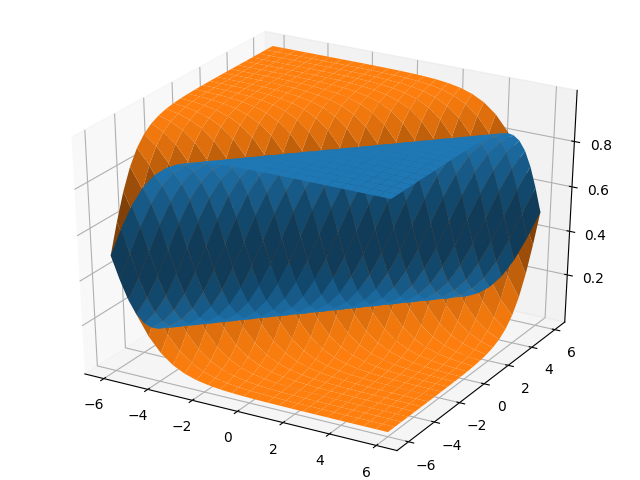

In [13]:
# pick a weight to be learned
target_weights = [4.3, -8.7]

# generate data
x = np.linspace(-6, 6, 24)
y = np.linspace(-6, 6, 24)

X, Y = np.meshgrid(x, y)
Z1 = []
Z2 = []
for z in zip(X.reshape(-1), Y.reshape(-1)):
    Z1.append(softmax([z[0],z[1]])[0])
    Z2.append(softmax([z[0],z[1]])[1])    
Z1 = np.array(Z1).reshape(24,-1)
Z2 = np.array(Z2).reshape(24,-1)

#plot data
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z1)
ax.plot_surface(X, Y, Z2)